![seattle](https://static.vecteezy.com/ti/vecteur-libre/p3/85645-paysage-de-seattle-vectoriel.jpg)

In [ ]:
# Dependencies and Setup
import requests
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [4]:
# Read the file
seattle_df = pd.read_csv("resources/Seattle.csv")

seattle_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Education_bachelors,Median_home_value,Year,lat,lng,city,state_name,county_names_all,Number of crimes,Prop_crime_rate
0,98101,14528.0,35.1,96893.0,91425.0,1799.0,12.382985,4233.0,751500.0,2021,47.61119,-122.33454,Seattle,Washington,King,3197,0.220058
1,98101,14380.0,35.3,91550.0,86176.0,1652.0,11.488178,4077.0,643300.0,2020,47.61119,-122.33454,Seattle,Washington,King,3013,0.209527
2,98101,13492.0,38.4,80389.0,79796.0,1649.0,12.222058,4010.0,661700.0,2019,47.61119,-122.33454,Seattle,Washington,King,2571,0.190557
3,98101,12792.0,38.6,74394.0,75850.0,1858.0,14.524703,4037.0,597700.0,2018,47.61119,-122.33454,Seattle,Washington,King,2774,0.216854
4,98101,12408.0,38.9,68750.0,70914.0,2061.0,16.610251,3773.0,523700.0,2017,47.61119,-122.33454,Seattle,Washington,King,2824,0.227595


In [5]:
# Rename the column
seattle_df.rename(columns={"Number of crimes": "Number of Property Crimes"}, inplace=True)
# Get the % of property crime
seattle_df["Prop_crime_rate"] = seattle_df["Prop_crime_rate"]*100

In [6]:
# Cleaning and preprocessing the data: This may include handling missing values, converting data types, and aggregating data.

seattle_df= seattle_df.loc[(seattle_df["Prop_crime_rate"] < 80)]
seattle_df.sort_values(by="Prop_crime_rate", ascending=False, inplace= True)
columns = ["Zipcode","Year","Population","Median Age","Household Income","Median_home_value","Poverty Rate","Poverty Count",
           "Education_bachelors" ,"Number of Property Crimes","Prop_crime_rate","lat","lng"]
seattle_df_cleaned = seattle_df[columns]

seattle_df_cleaned

,Zipcode,Year,Population,Median Age,Household Income,Median_home_value,Poverty Rate,Poverty Count,Education_bachelors,Number of Property Crimes,Prop_crime_rate,lat,lng
4,98101,2017,12408.0,38.9,68750.0,523700.0,16.610251,2061.0,3773.0,2824,22.759510,47.61119,-122.33454
0,98101,2021,14528.0,35.1,96893.0,751500.0,12.382985,1799.0,4233.0,3197,22.005782,47.61119,-122.33454
3,98101,2018,12792.0,38.6,74394.0,597700.0,14.524703,1858.0,4037.0,2774,21.685428,47.61119,-122.33454
1,98101,2020,14380.0,35.3,91550.0,643300.0,11.488178,1652.0,4077.0,3013,20.952712,47.61119,-122.33454
2,98101,2019,13492.0,38.4,80389.0,661700.0,12.222058,1649.0,4010.0,2571,19.055737,47.61119,-122.33454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,98168,2017,31771.0,36.6,53992.0,269000.0,16.936829,5381.0,3192.0,1,0.003150,47.48898,-122.30175
128,98168,2018,32738.0,36.6,56885.0,295800.0,14.365569,4703.0,3474.0,1,0.003050,47.48898,-122.30175
126,98168,2020,33217.0,36.5,66237.0,353900.0,12.644128,4200.0,3664.0,1,0.003010,47.48898,-122.30175
127,98168,2019,33401.0,36.2,59120.0,330300.0,12.924763,4317.0,3595.0,1,0.002990,47.48898,-122.30175


In [7]:
# Number of Zip Code
len(seattle_df_cleaned["Zipcode"].value_counts())

28

In [8]:
# Number of Property crimes over 5 years (2017-2021)
seattle_df_cleaned["Number of Property Crimes"].sum()

184926

In [9]:
#Use groupby and summary statistical methods to calculate the following properties of the
 # mean, median, variance, standard deviation, and SEM of Poverty Count.  

mean =seattle_df_cleaned["Poverty Count"].groupby(seattle_df_cleaned["Year"]).mean()

median = seattle_df_cleaned["Poverty Count"].groupby(seattle_df_cleaned["Year"]).median()

variance = seattle_df_cleaned["Poverty Count"].groupby(seattle_df_cleaned["Year"]).var()

standard_deviation = seattle_df_cleaned["Poverty Count"].groupby(seattle_df_cleaned["Year"]).std()

sem = seattle_df_cleaned["Poverty Count"].groupby(seattle_df_cleaned["Year"]).sem()

#Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({"Mean Poverty Count" : mean,"Median Poverty Count" : median,
                                  "Poverty Count Variance" : variance,
                                   "Poverty Count Std. Dev." :  standard_deviation,
                                  "Poverty Count Std. Err." : sem})
summary_statistics

,Mean Poverty Count,Median Poverty Count,Poverty Count Variance,Poverty Count Std. Dev.,Poverty Count Std. Err.
Year,,,,,
2017,3653.107143,3097.5,6.206818e+06,2491.348621,470.820634
2018,3507.071429,3104.0,6.384213e+06,2526.700101,477.501436
2019,3312.178571,2619.0,5.792639e+06,2406.790164,454.840588
2020,3171.892857,2506.0,4.570382e+06,2137.845287,404.014784
2021,3094.678571,2521.5,3.982410e+06,1995.597563,377.132491


In [11]:
#Use groupby and summary statistical methods to calculate the following properties of the
 # mean, median, variance, standard deviation, and SEM of the the Property crimes.  

mean =seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Year"]).mean()

median = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Year"]).median()

variance = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Year"]).var()

standard_deviation = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Year"]).std()

sem = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Year"]).sem()

#Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({"Mean of Property  Crimes" : mean,"Median of Property crimes" : median,
                                  "Property crimes Variance" : variance,
                                   "Property crimes Std. Dev." :  standard_deviation,
                                  "Property crimes. Err." : sem})
summary_statistics

,Mean of Property Crimes,Median of Property crimes,Property crimes Variance,Property crimes Std. Dev.,Property crimes. Err.
Year,,,,,
2017,1351.071429,1228.5,710768.365079,843.070795,159.325404
2018,1325.642857,1245.5,683256.756614,826.593465,156.211482
2019,1193.428571,1147.0,564499.439153,751.331777,141.988360
2020,1348.678571,1274.0,738087.559524,859.120224,162.358461
2021,1385.678571,1318.0,782192.374339,884.416403,167.138990


In [13]:
#Use groupby and summary statistical methods to calculate the following properties of the
 # mean, median, variance, standard deviation, and SEM of the Property crimes by Zipcode.  

mean =seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Zipcode"]).mean()

median = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Zipcode"]).median()

variance = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Zipcode"]).var()

standard_deviation = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Zipcode"]).std()

sem = seattle_df_cleaned["Number of Property Crimes"].groupby(seattle_df_cleaned["Zipcode"]).sem()

#Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({"Mean of Property  crimes" : mean,"Median of Property crimes" : median,
                                  "Property crimes Variance" : variance,
                                   "Property crimes Std. Dev." :  standard_deviation,
                                  "Property crimes. Err." : sem})
summary_statistics

,Mean of Property crimes,Median of Property crimes,Property crimes Variance,Property crimes Std. Dev.,Property crimes. Err.
Zipcode,,,,,
98101,2875.8,2824.0,56985.7,238.716778,106.757389
98102,1241.0,1263.0,3820.0,61.806149,27.640550
98103,2606.8,2652.0,20320.7,142.550693,63.750608
98104,2128.8,2193.0,16369.2,127.942174,57.217480
98105,2246.0,2282.0,13518.5,116.269084,51.997115
98106,1103.0,1135.0,7489.0,86.539009,38.701421
98107,1396.2,1380.0,5049.7,71.061241,31.779553
98108,1321.8,1350.0,9114.7,95.470938,42.695901
98109,2037.2,2063.0,8919.2,94.441516,42.235530


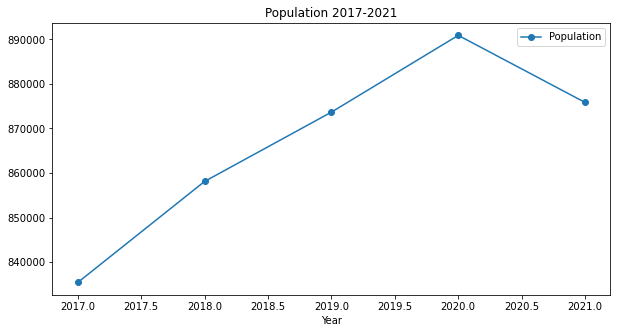

In [130]:
# Aggregate the data by summing the values in column Population for each year
pop_df = seattle_df_cleaned.groupby("Year").agg({"Population": "sum"})

# Plot the aggregated values as a bar chart
pop_df.plot.line(figsize=(10, 5), marker="o")

# Add a title to the chart
plt.title("Population 2017-2021")

plt.savefig('Output/Population.png')
# Show the chart
plt.show()

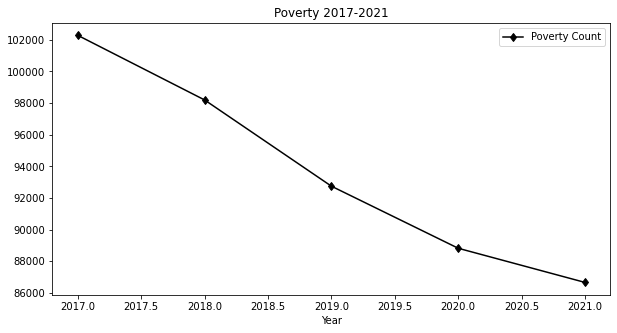

In [122]:
# Aggregate the data by summing the values in column Poverty for each year
pov_df = seattle_df_cleaned.groupby("Year").agg({"Poverty Count": "sum"})

# Plot the aggregated values as a bar chart
pov_df.plot.line(figsize=(10, 5), marker="d", color="black")

# Add a title to the chart
plt.title("Poverty 2017-2021")

plt.savefig('Output/Poverty.png')
# Show the chart
plt.show()

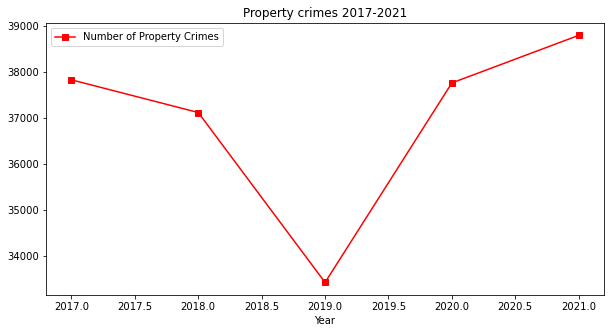

In [123]:
# Aggregate the data by summing the values in column Property crimes for each year
pro_df = seattle_df_cleaned.groupby("Year").agg({"Number of Property Crimes": "sum"})

# Plot the aggregated values as a bar chart
pro_df.plot.line(figsize=(10, 5), marker="s", color="red")

# Add a title to the chart
plt.title("Property crimes 2017-2021")

plt.savefig('Output/Prpoertycrimes.png')
# Show the chart
plt.show()

In [24]:
seattle_df_cleaned.dtypes

Zipcode                        int64
Year                           int64
Population                   float64
Median Age                   float64
Household Income             float64
Median_home_value            float64
Poverty Rate                 float64
Poverty Count                float64
Education_bachelors          float64
Number of Property Crimes      int64
Prop_crime_rate              float64
lat                          float64
lng                          float64
dtype: object

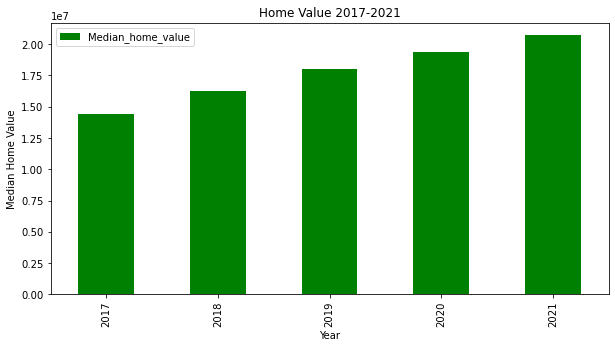

In [124]:
# Aggregate the data by summing the values in column Median_home_value for each Year
hv_df = seattle_df_cleaned.groupby("Year").agg({"Median_home_value": "sum"})

# Plot the aggregated values as a bar chart
hv_df.plot.bar(figsize=(10, 5), color="green")

# Add a title to the chart
plt.title("Home Value 2017-2021")
plt.ylabel("Median Home Value")

plt.savefig('Output/Median home value.png')
# Show the chart
plt.show()

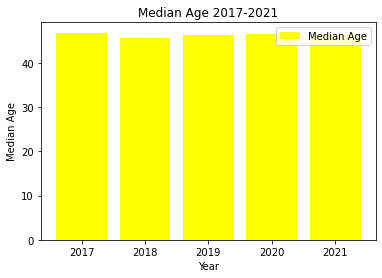

In [60]:
# Generate a bar plot showing the Median Age for each Year using pyplot.
# Set x/y axis
x_axis = seattle_df_cleaned["Year"]
y_axis = seattle_df_cleaned["Median Age"]
legend = ["Median Age"]
# Generate the bar plot, title, and x/y labels
plt.bar(x_axis, y_axis, color="yellow")
plt.legend(legend, loc="best")
plt.title("Median Age 2017-2021")
plt.xlabel("Year")
plt.ylabel("Median Age")

# Show the chart
plt.show()

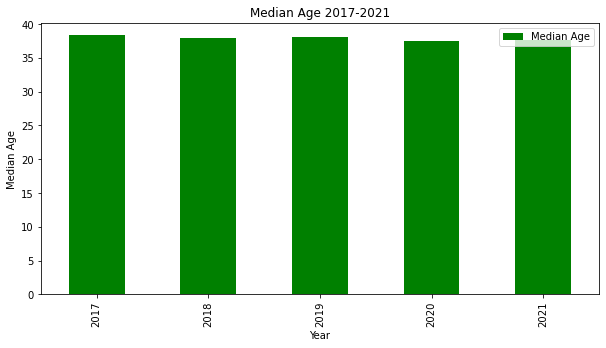

In [63]:
# Aggregate the data by summing the values in column Median Age for each Year
hv_df = seattle_df_cleaned.groupby("Year").agg({"Median Age": "median"})

# Plot the aggregated values as a bar chart
hv_df.plot.bar(figsize=(10, 5), color="green")

# Add a title to the chart
plt.title("Median Age 2017-2021")
plt.ylabel("Median Age")
# Show the chart
plt.show()

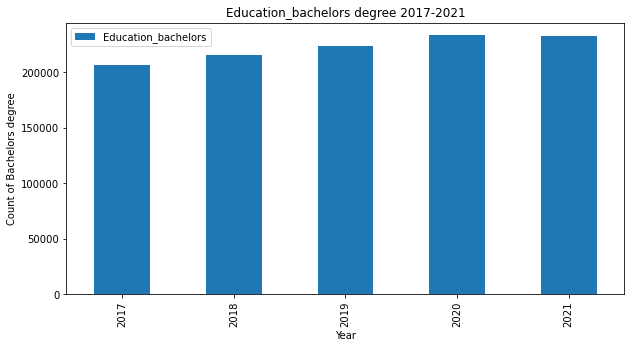

In [67]:
# Aggregate the data by summing the values in column education bachelors for each year
agg_df = seattle_df_cleaned.groupby("Year").agg({"Education_bachelors": "sum"})

# Plot the aggregated values as a bar chart
agg_df.plot.bar(figsize=(10, 5))

# Add a title to the chart
plt.title("Education_bachelors degree 2017-2021")
plt.ylabel("Count of Bachelors degree")
# Show the chart
plt.show()

In [129]:
# Get the hvplot.points of Property crime rate in seattle
seattle_df_cleaned.hvplot.points("lng","lat", geo=True, tiles= "OSM", frame_width=800, frame_height=600, color="Prop_crime_rate")

# plt.savefig('Output/heatmap.png')

C:\Users\mohamed.bensaidani\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\mohamed.bensaidani\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\mohamed.bensaidani\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\mohamed.bensaidani\Anaconda3\lib\site-packages\ca

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Prop_crime_rate)

In [80]:
seattle_df_cleaned.dtypes

Zipcode                        int64
Year                           int64
Population                   float64
Median Age                   float64
Household Income             float64
Median_home_value            float64
Poverty Rate                 float64
Poverty Count                float64
Education_bachelors          float64
Number of Property Crimes      int64
Prop_crime_rate              float64
lat                          float64
lng                          float64
dtype: object

The correlation between crime and home value is 0.21
The r² is : 0.04
There is a positive correlation between home value and Property crime 


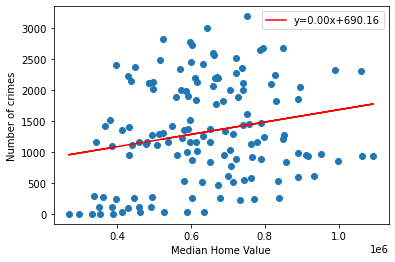

In [120]:
# Correlation between Number of crimes and home value
# Define x, y values
x_values = seattle_df_cleaned['Median_home_value']
y_values = seattle_df_cleaned['Number of Property Crimes']

# Calculate the correlation

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between crime and home value is {correlation}' )

# Calculate the linear regression values
(slope, intercept, r, p, stderr) = st.linregress(x_values, y_values)

# Calculate r²
r_sq = round(r**2,2)
print(f'The r² is : {r_sq}' )

# y= ax+b
regress_values = x_values*slope+intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept))

# plot the scatter chart with linear regression line, equation of line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Set x/y label & legend
plt.xlabel("Median Home Value")
plt.ylabel("Number of crimes")
plt.legend()

print("There is a positive correlation between home value and Property crime ")

The correlation between crime and poverty rate is 0.35
The r² is : 0.12
There is a positive correlation between property crimes and poverty rate in seattle


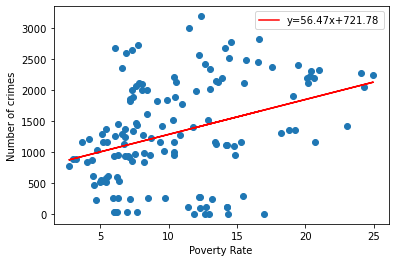

In [94]:
# Correlation between Number of crimes and poverty rate
# Define x, y values
x_values = seattle_df_cleaned['Poverty Rate']
y_values = seattle_df_cleaned['Number of Property Crimes']

# Calculate the correlation

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between crime and poverty rate is {correlation}' )

# Calculate the linear regression values
(slope, intercept, r, p, stderr) = st.linregress(x_values, y_values)

# Calculate r²
r_sq = round(r**2,2)
print(f'The r² is : {r_sq}' )

# y= ax+b
regress_values = x_values*slope+intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept))

# plot the scatter chart with linear regression line, equation of line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Set x/y label & legend
plt.xlabel("Poverty Rate")
plt.ylabel("Number of crimes")
plt.legend()

print("There is a positive correlation between property crimes and poverty rate in seattle")

The correlation between crime and poverty rate is 0.45
The r² is : 0.2
There is a positive correlation between property crimes and bachelor degree education in seattle


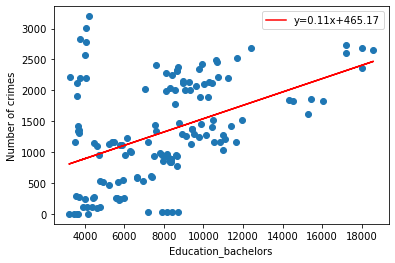

In [98]:
# Correlation between Number of crimes and education
# Define x, y values
x_values = seattle_df_cleaned['Education_bachelors']
y_values = seattle_df_cleaned['Number of Property Crimes']

# Calculate the correlation

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between crime and education is {correlation}' )

# Calculate the linear regression values
(slope, intercept, r, p, stderr) = st.linregress(x_values, y_values)

# Calculate r²
r_sq = round(r**2,2)
print(f'The r² is : {r_sq}' )

# y= ax+b
regress_values = x_values*slope+intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept))

# plot the scatter chart with linear regression line, equation of line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Set x/y label & legend
plt.xlabel("Education_bachelors")
plt.ylabel("Number of crimes")
plt.legend()

print("There is a positive correlation between property crimes and bachelor degree education in seattle")

The correlation between crime and Household Income is -0.22
The r² is : 0.05
There is a positive correlation between property crimes and bachelor degree education in seattle


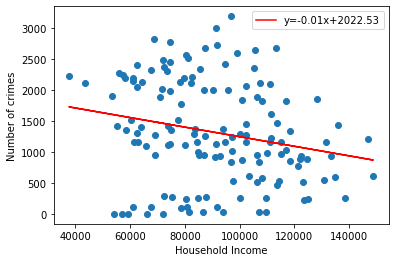

In [102]:
# Correlation between Number of crimes and Household Income 
# Define x, y values
x_values = seattle_df_cleaned['Household Income']
y_values = seattle_df_cleaned['Number of Property Crimes']

# Calculate the correlation

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between crime and Household Income is {correlation}' )

# Calculate the linear regression values
(slope, intercept, r, p, stderr) = st.linregress(x_values, y_values)

# Calculate r²
r_sq = round(r**2,2)
print(f'The r² is : {r_sq}' )

# y= ax+b
regress_values = x_values*slope+intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept))

# plot the scatter chart with linear regression line, equation of line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Set x/y label & legend
plt.xlabel("Household Income")
plt.ylabel("Number of crimes")
plt.legend()

print("There is a positive correlation between property crimes and bachelor degree education in seattle")

In [116]:
# plt.boxplot(seattle_df_cleaned['Number of Property Crimes'])
# plt.ylabel('Crime Rate')
# plt.title('Box Plot of Crime Rate')
# plt.show()

# Put main Zipcodes of crimes into a list for loop (and later for plot labels)
zipcode= ["98101", "98104", "98109", "98121", "98122", "98144"]

# Create empty list to fill with crimes data (for plotting)
crimes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for location in zipcode:
    
    # Locate the rows which contain crimes on each zipcode and get the number of crimes
    number_of_crimes= seattle_df_cleaned.loc[seattle_df_cleaned["Zipcode"] == location, "Number of Property Crimes"]
    
    # add subset 
    crimes_list.append(number_of_crimes)
    
    # Calculate the IQR and quantitatively
    quartiles = number_of_crimes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = number_of_crimes.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = number_of_crimes.loc[(number_of_crimes < lower_bound) | (number_of_crimes > upper_bound)]

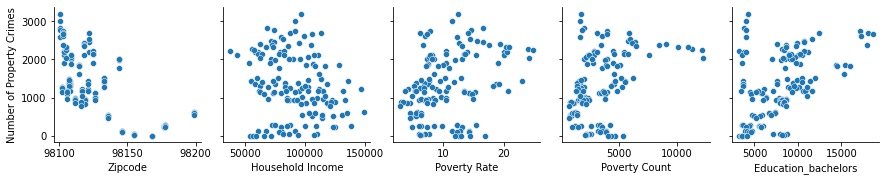

In [110]:

import seaborn as sns

# Use seaborn's pairplot function to visualize the relationships between each pair of variables

sns.pairplot(seattle_df_cleaned, x_vars=['Zipcode','Household Income','Poverty Rate','Poverty Count','Education_bachelors'], y_vars=['Number of Property Crimes'])
plt.show()

